<a href="https://colab.research.google.com/github/aditimukerjee/DL-Logistic-Regression-Cat-and-Non-Cat-Image-Classification/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
MNIST dataset 


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf


Shown below is the MNIST dataset

In [97]:
data_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
data_mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [101]:
print(data_mnist.shape)

AttributeError: ignored

#1. LOADING THE DATASET  AND EXPLORING IT 
Splittint the entire dataset into testing and developmental dataset

In [10]:
(X_dev,Y_dev),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()
print("Developmental set")
print(X_dev.shape)
print(Y_dev.shape)


print("Testing set")
print(X_test.shape)
print(Y_test.shape)

Developmental set
(60000, 28, 28)
(60000,)
Testing set
(10000, 28, 28)
(10000,)


The devlopmental dataset has 60k rows with images of 28 pixel by 28 pixel

The testing dataset has 10k rows with images of 28 pixel by 28 pixel


##Exploring the classes in the dataset

In [12]:
print("Number of classes in the developmental dataset")
print(np.unique(Y_dev))

print("Number of classes in the testing dataset")
print(np.unique(Y_test))

Number of classes in the developmental dataset
[0 1 2 3 4 5 6 7 8 9]
Number of classes in the testing dataset
[0 1 2 3 4 5 6 7 8 9]


There are 10 unique classes in the dataset


##HISTOGRAM OF THE DEVELOPMENTAL DATASET

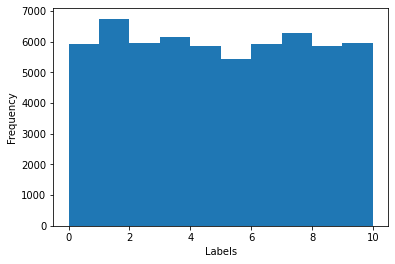

In [19]:
plt.figure()
plt.hist(Y_dev,bins = range(0,11))#since the numbers range from 0 to 10
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()

The propositions of labels in the developmental datset depict a uniform distribtion 

##SPLITTING DEVELOPMENTAL SET INTO TRAIN AND VALIDATION SET

In [33]:
indexes = np.arange(Y_dev.size ,dtype = int) #creating an array of all the labels in the developmental set
#size of the samples in the development set, type
np.random.shuffle(indexes) # shuffling the indexes
X_dev = X_dev[indexes]
Y_dev = Y_dev[indexes]
# need to shuffle them in a syncoryzed manner so that the x and y correspond to one another

#DEFINING THE SPLIT RATIO
nsplit = int(0.75*Y_dev.size) # split ratio of the developmental dataset
#splitting data into 75% developmental set and 25% test set

X_train = X_dev[:nsplit]
Y_train = Y_dev[:nsplit]

X_val = X_dev[nsplit:]
Y_val = Y_dev[nsplit:]

print("Samples in training set")
print(X_train.shape)

print("Samples in validation set")
print(X_val.shape)

Samples in training set
(45000, 28, 28)
Samples in validation set
(15000, 28, 28)


From 60k samples in the training set 45k went to training set and 15k went to validation set

##DEPICTING BASIC INFORMATION ABOUT THE DATASET

In [38]:
print("Training dataset info")
print(X_train.min(), X_train.max(), X_train.mean(),X_train.std())

print("--------------------------------------")
print("Validation dataset info")
print(X_val.min(), X_val.max(), X_val.mean(),X_val.std())

Training dataset info
0 255 33.265320918367344 78.50601555906351
--------------------------------------
Validation dataset info
0 255 33.47772304421769 78.75141050348405


Here we see the basic information aboutr the dataset
In the trainining dataset the we see the min,max, mean and standard deviation are 0, 255, 33 and 78 respectively

In the validation dataset the we see the min,max, mean and standard deviation are 0, 255, 33 and 79 respectively

Both the values seem to be close ie. the data has been shuffled well

#2. DATA SCALING

In [40]:
norm_type = 0 #0 ---> min_max normalization , 1----> standardization (mean/std)

if norm_type == 0:
  X_train = X_train/255
  X_val = X_val/255
  X_test = X_test/255
elif norm_type == 1:  
  train_mean = X_train.mean()
  train_std = X_train.std()
  X_train = X_train -train_mean /train_std
  X_val = X_val -train_mean /train_std
  X_test = X_test -train_mean /train_std  
else:
  pass # no normalization at all  

We use the min_max normalization since the distribution is not gaussian

ASK

#3.One Hot Encoding

In [44]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
Y_test_oh = tf.keras.utils.to_categorical(Y_test)

print("First 5 samples of the training dataset")
print (Y_train[0:5])

print("First 5 one hot encoded samples of the training dataset")
print (Y_train_oh[0:5])

First 5 samples of the training dataset
[4 3 2 7 8]
First 5 one hot encoded samples of the training dataset
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


It seems that one hot encoding has been done correctly

#4.Define your model,cost function, optimizer, learning rate

In [65]:
def my_model(ishape = (28,28) , k =10 , lr = 1e-4): #shape of images, classes , learning rate
    model_input = tf.keras.Input(shape = ishape)
    model_input_flatten = tf.keras.layers.Flatten()(model_input) #layers are being flattened, input is the previosu layer
    out = tf.keras.layers.Dense(k, activation = 'softmax') (model_input_flatten) # one layer that is output , k is classes, activation is softmax we need a probabilty at the end , input is model_input_flatten
    model = tf.keras.models.Model(inputs =model_input , outputs = out ) #defining the model # define inputs and outputs to the model
    model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'categorical_crossentropy', metrics = ['accuracy']) # compiling the model - define the optimzer, cost function 
    return model





#5. Defining 3 callbacks (callbacks means that if the model is not improving it will stop)

In [66]:
model_name = "best_model_mnist.h5"
#CALLBACK - 1 - early_stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 20) # if for 20 epochs the val_loss does not improve the training is going to be intereppupted
#patience is how long the model is going to train without intereppupting

#CALLBACK - 2 - monitor
monitor = tf.keras.callbacks.ModelCheckpoint (model_name, monitor = 'val_loss',save_best_only = True , save_weights_only = True )
# you save the best model and the weights
#the callback is going the keep on chekcing the validation error and if teh validation error decreases tehn we will save the model as the best model
# mode is whether u wabnt to save the minimum or maximum value of teh cost function, we are not defining mode as it is automaticcally defined defined by tf

#CALLBACK - 3 - lr_schedule
def scheduler(epoch, lr):
  if epoch%10==0:  #every 10 epoch reduce the learning rate by a factor of 2 # 10 here use some other number elsewhere
    lr = lr/2
  return lr
  
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)# definding the callback

TRAIN THE MODEL

In [67]:
model= my_model() #model is calling the model function that was defined in step 4

model.fit(X_train,Y_train_oh,batch_size = 32, epochs=  200, verbose = 1, callbacks = [early_stop, monitor, lr_schedule], validation_data = (X_val,Y_val_oh), shuffle = True)
#larger batches take longer to train and smaller batch sizes can train faster
#graident approxinmation for a small batch size may not be that good
# batch_size is the number of samples taht we use to estiamet teh gradient before taking one step
#shuffle ie.e batches that u snet to the GPU are shuffled

Epoch 1/200
1407/1407 [==============================] - 3s 2ms/step - loss: 2.3004 - accuracy: 0.3071 - val_loss: 2.2935 - val_accuracy: 0.5003
Epoch 2/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2914 - accuracy: 0.5068 - val_loss: 2.2844 - val_accuracy: 0.5238
Epoch 3/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2824 - accuracy: 0.5237 - val_loss: 2.2754 - val_accuracy: 0.5342
Epoch 4/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2736 - accuracy: 0.5373 - val_loss: 2.2664 - val_accuracy: 0.5463
Epoch 5/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2647 - accuracy: 0.5500 - val_loss: 2.2575 - val_accuracy: 0.5585
Epoch 6/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2559 - accuracy: 0.5649 - val_loss: 2.2487 - val_accuracy: 0.5697
Epoch 7/200
1407/1407 [==============================] - 2s 2ms/step - loss: 2.2474 - accuracy: 0.5754 - val_loss: 2.2399 - val_ac

Here we know the training dataset has 45k samples and a batch size of 32. So we need to train 1406.5 , approximately 1407 samples in each batch
1407*32 = 45K should be equal to the number of data points in the training set

We know that epoch is the number iterations or teh number of times we will run the iterations. Here we stop at 150 epoch becaus ethe validation error is not improving any further
The accuracy is poor


### 7.TESTING THE MODEL ON THE TEST SET AND EXTRACTING RELEVANT METRICS

In [75]:
model.load_weights(model_name) # here the weight we are produced during model training
metrics = model.evaluate(X_test, Y_test_oh) # it will return the loss and metrics when we are testing the model # here we have categorical cross entropy here is loss and accuracy is the metrics
#print(metrics) # in step 4 we stated that we wan to measure and monitor two metrics
print("Categorical cross-entropy:" , metrics[0])
print("Accuracy:" , metrics[1])


313/313 [==============================] - 0s 923us/step - loss: 2.1271 - accuracy: 0.6755
Categorical cross-entropy: 2.127082109451294
Accuracy: 0.6754999756813049


#LOOKING AT THE WRONGLY CLASSIFIED IMAGES

[7 2 1 ... 7 1 6]
[   6    8    9 ... 9988 9997 9998]


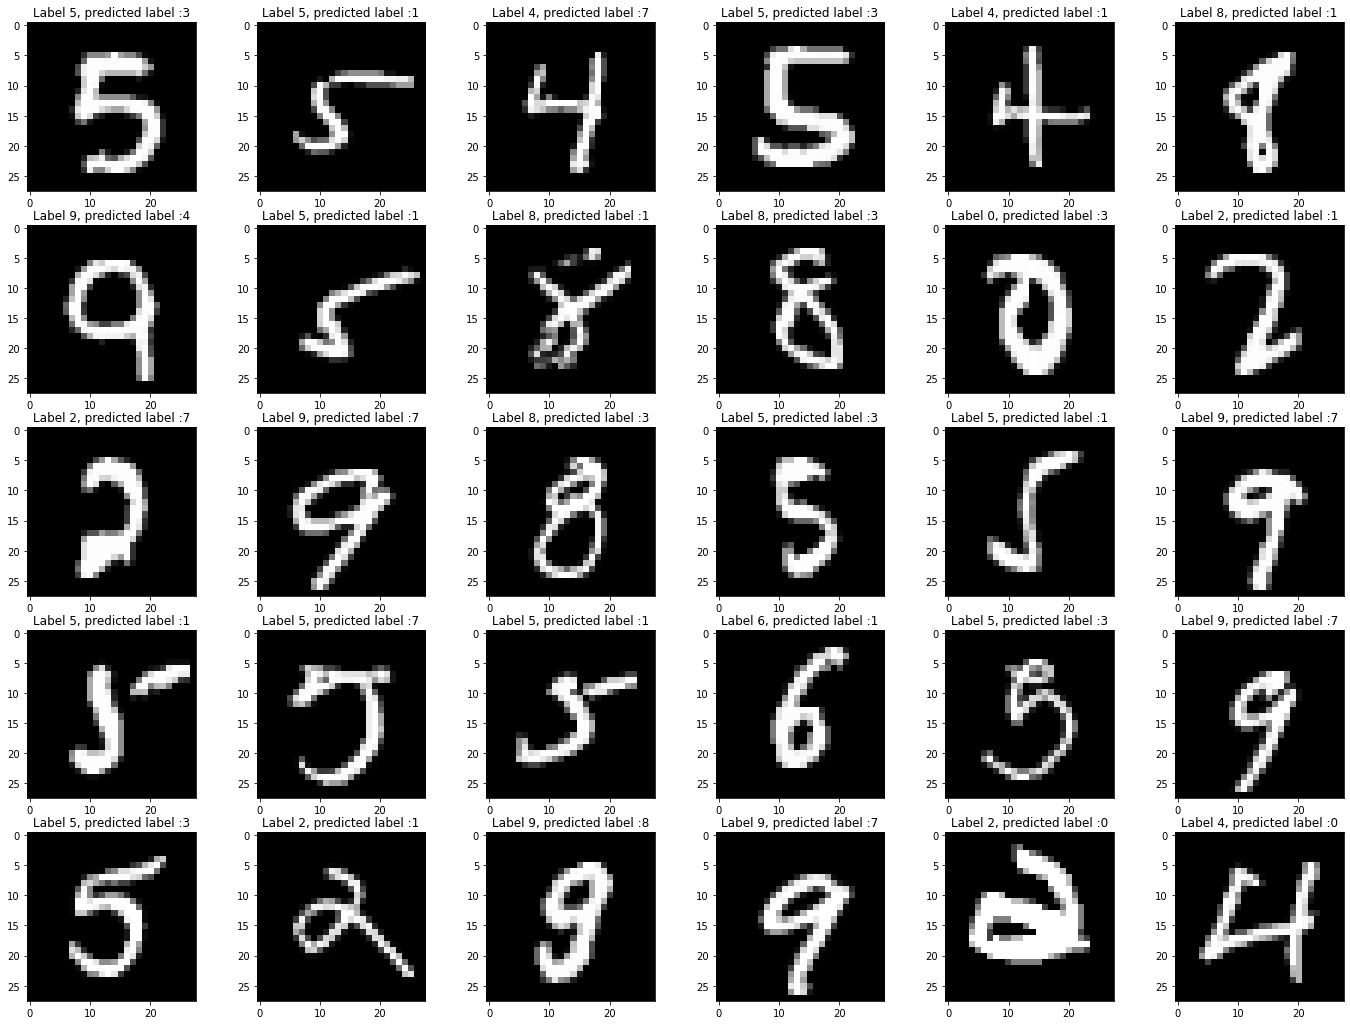

In [107]:
Y_pred = model.predict(X_test).argmax(axis = 1)# Here we are looking at the iamges and predicting the labels across the rows of the test set
print(Y_pred)
# input is x_test and labels is being predicted
# here we are predicting the class with the highest probability
wrong_indexes = np.where(Y_pred !=Y_test)[0] #Predictions are differnet from the ground truth ie. test set
print(wrong_indexes)

 #looking at images that I want to identify incoorectly classified images so that I can understand where my model is unable to get correct results
sample_indexes = np.random.choice (np.arange(wrong_indexes.size, dtype  = int), size = 30, replace = False ) #chosing 30 cases when the classification did not work
 # 30 wrong images that are not repeasted
 #above we show a subset of indexes
[0]
#polotting cases when the classification failed
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes): # looking through 30 wrong images # position is ii and iamge is jj
   plt.subplot(5,6,ii+1) # each figure will have a different subplot. Each subplot wiull have 5 rows and 6 columns starting at index 1 (ii+1)
   plt.imshow(X_test[wrong_indexes[jj]], cmap = 'gray') # the image that i want to show is the wrong image at position jj
   plt.title("Label %d, predicted label :%d"%(Y_test[wrong_indexes[jj]], Y_pred[wrong_indexes[jj]]))
plt.show()

In [ ]:
what is ii and jj ask

inc layers
change 